In [15]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as plt

import copy
import datetime

import pycountry

In [16]:
%matplotlib inline

# Load data

In [5]:
input_file_path = 'data/train.csv'

In [6]:
df_initial = pd.read_csv(input_file_path)

In [24]:
df_initial.shape

(8164, 14)

In [8]:
df_initial.head()

,id,birth date,job type,school level,domestic status,profession,domestic relationship type,ethnicity,gender,earned dividends,interest earned,monthly work,country of origin,target
0,15463,1983-12-26,private,secondary,single,mechanic,never married,afro american,Female,0,0,160,u.s.,1
1,2202,1962-12-31,private,college graduate,spouse passed,secretarial,never married,white and privileged,Female,0,0,160,u.s.,1
2,29145,1979-12-27,private,college graduate,married 2,C-level,has husband,white and privileged,Female,0,0,200,u.s.,0
3,11330,1965-12-30,private,entry level college,married 2,sales,has husband,white and privileged,Female,0,0,208,canada,0
4,20822,1967-12-30,self-emp-inc,entry level college,divorce pending,C-level,never married,white and privileged,Female,0,0,300,u.s.,1


### Rename columns

In [9]:
def rename_columns(df):    
    names_mapping = {}
    for col in df.columns:
        names_mapping[col] = col.replace(' ', '_')
    return df.rename_axis(names_mapping, axis='columns')

In [10]:
df_initial_renamed = rename_columns(df_initial)

# Check data cleanyness

In [9]:
df_initial_renamed.isnull().sum()

id                            0
birth_date                    0
job_type                      0
school_level                  0
domestic_status               0
profession                    0
domestic_relationship_type    0
ethnicity                     0
gender                        0
earned_dividends              0
interest_earned               0
monthly_work                  0
country_of_origin             0
target                        0
dtype: int64

# Checking datatypes

**Categorical variables**
- Job Type (nominal)
- School Level (ordinal)
- Domestic Status (nominal)
- Profession (nominal)
- Domestic Relationship Status (nominal)
- Ethnicity (nominal)
- Gender (binary?)
- Country of origin (nominal)

**Numeric variables**
- Birth date (after transformation)
- Earned dividends
- Interest earned
- Monthly Work

**Target**

Binary

In [10]:
df_initial_renamed.dtypes

id                             int64
birth_date                    object
job_type                      object
school_level                  object
domestic_status               object
profession                    object
domestic_relationship_type    object
ethnicity                     object
gender                        object
earned_dividends               int64
interest_earned                int64
monthly_work                   int64
country_of_origin             object
target                         int64
dtype: object

In [11]:
categorical_variables = [
    "job_type",
    "school_level",
    "domestic_status",
    "profession",
    "domestic_relationship_type",
    "ethnicity",
    "gender"    
]

In [12]:
df_initial_renamed.describe(include=['object'])

,birth_date,job_type,school_level,domestic_status,profession,domestic_relationship_type,ethnicity,gender,country_of_origin
count,8164,8164,8164,8164,8164,8164,8164,8164,8164
unique,71,9,16,7,14,6,5,1,42
top,1998-12-22,private,secondary,single,secretarial,not living with family,white and privileged,Female,u.s.
freq,285,5919,2594,3662,1949,2919,6523,8164,7330


In [13]:
df_initial_renamed.job_type.value_counts()

private             5919
unknown              620
local-gov            618
state-gov            368
self-emp-not-inc     303
federal-gov          236
self-emp-inc          94
without-pay            4
never-worked           2
Name: job_type, dtype: int64

How to get correlations per category?

We can see a lot of "gov" jobs that we might potentially categorize together

In [14]:
df_initial_renamed.school_level.value_counts()

secondary                 2594
entry level college       2165
college graduate          1188
basic vocational           373
some post graduate         355
secondary 11               341
advanced vocational        326
10th                       248
secondary-7 through 8      123
secondary 12               106
secondary-9                104
secondary-5 through 6       72
advanced post graduate      61
primary school              58
primary 1 through 4         37
kindergarten                13
Name: school_level, dtype: int64

We need to group these beter. Later, we need to order them

In [15]:
df_initial_renamed.domestic_status.value_counts()

single                  3662
d                       2073
married 2               1170
spouse passed            599
divorce pending          486
married not together     163
married 1                 11
Name: domestic_status, dtype: int64

What is "d"? divorced?

In [16]:
df_initial_renamed.domestic_relationship_type.value_counts()

not living with family        2919
never married                 2063
living with child             1750
has husband                   1106
living with extende family     325
has wife                         1
Name: domestic_relationship_type, dtype: int64

The dataset is all about woman. That's why there's a single lesbian.

Consider "is currently single?"
"lives with partner?"
"lives with children?"
"has_married"?

Also, we might be able to cross the info from domestic_relationship_type with domestic_status.

In [61]:
df_initial_renamed.profession.value_counts()

secretarial              1949
other                    1423
specialist technician    1096
sales                     978
C-level                   842
unknown                   622
mechanic                  420
technology support        247
vocational                184
household labor           131
estate employee           108
trucking                   58
defense contractor         58
agriculture                48
Name: profession, dtype: int64

Let's drop this one

In [17]:
df_initial_renamed.ethnicity.value_counts()

white and privileged    6523
afro american           1210
asian                    262
american indian           88
other                     81
Name: ethnicity, dtype: int64

In [18]:
df_initial_renamed.gender.value_counts()

Female    8164
Name: gender, dtype: int64

In [25]:
df_initial_renamed.country_of_origin.value_counts()

u.s.               7330
unknown             126
mexico              111
philippines          60
de                   50
puerto rico          39
jamaica              34
cuba                 34
el-salvador          30
canada               28
dr                   27
gb                   22
south                20
italy                18
china                17
columbia             17
haiti                17
vietnam              17
guatemala            16
japan                15
poland               14
taiwan               11
thailand             11
peru                 11
fr                    9
trinadad/tobago       8
india                 7
nicaragua             7
portugal              6
laos                  6
iran                  6
ecuador               6
honduras              6
ireland               5
us territory          4
hong                  4
yugoslavia            3
scotland              3
hungary               3
greece                3
cambodia              2
netherlands     

Let's just drop this.

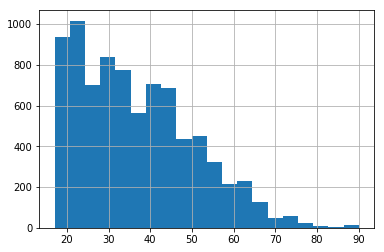

In [31]:
years_old(df_initial_renamed).hist(bins=20)

## Numeric variables

* Birth date (after transformation)
* Earned dividends
* Interest earned
* Monthly Work

Birth date needs to be converted ... to year + month + date? Just calculate age instead

In [19]:
df_initial_renamed.describe(exclude=['object'])

,id,earned_dividends,interest_earned,monthly_work,target
count,8164.000000,8164.0,8164.000000,8164.000000,8164.000000
mean,16295.799118,0.0,65.942675,145.220480,0.913033
std,9395.405512,0.0,355.138214,47.193871,0.281804
min,4.000000,0.0,0.000000,4.000000,0.000000
25%,8132.500000,0.0,0.000000,120.000000,1.000000
50%,16318.500000,0.0,0.000000,160.000000,1.000000
75%,24430.000000,0.0,0.000000,160.000000,1.000000
max,32558.000000,0.0,4356.000000,396.000000,1.000000


Earned_dividends can be droped.

In [35]:
df_initial_renamed.target.mean()

0.91303282704556588

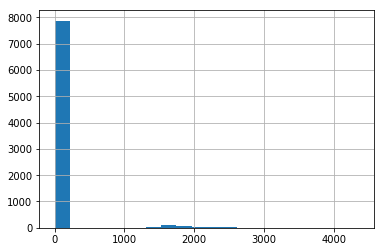

In [33]:
df_initial_renamed.interest_earned.hist(bins=20)

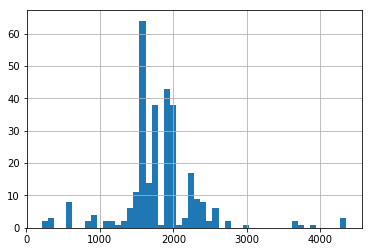

In [21]:
df_initial_renamed[(df_initial_renamed.interest_earned > 0)].interest_earned.hist(bins=50)

In [22]:
float((df_initial_renamed.interest_earned > 0).sum()) / df_initial_renamed.interest_earned.count()

0.03637922586967173

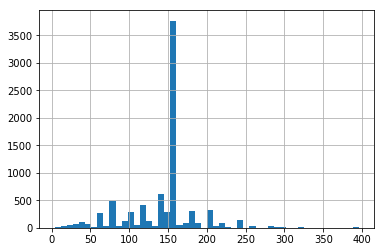

In [23]:
df_initial_renamed.monthly_work.hist(bins=50)

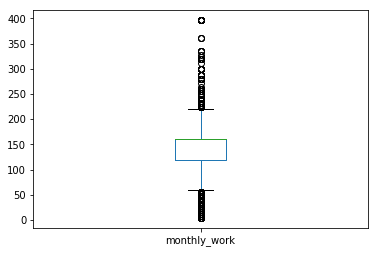

In [24]:
df_initial_renamed.monthly_work.plot(kind='box')

# Target

In [25]:
df_initial_renamed.target.value_counts()

1    7454
0     710
Name: target, dtype: int64

# Strategy

Variables to drop:
* ID X
* Gender X
* Earned Dividends X
* Profession

Transform variables:
* Convert Birth date to age X
* Categorize and covert school_level to numeric X
* Maybe binarize interest_earned X
* Binarize country of origin into 'is_imigrant' X
* Group job types by (gov, private, self-employed), then convert to dummies 
* From domestic_relationship_type and domestic_relationship_status, extract "is currently single?", "lives with partner?", "lives with children?" and "has_married"?


### Required Mappings

In [20]:
school_level_mapping = {
    'kindergarten': 0,
    'primary 1 through 4': 2,
    'primary school': 4,
    'secondary-5 through 6':6,
    'secondary-7 through 8': 8,    
    'secondary-9': 9,
    '10th': 10,
    'secondary 11': 11,
    'secondary': 12,
    'secondary 12': 12,
    'basic vocational': 14,
    'entry level college': 14,
    'advanced vocational': 15,
    'college graduate': 16,
    'some post graduate': 18,
    'advanced post graduate': 20,  
}

job_type_map = {
    'private': 'private',
    'unknown': 'other',
    'local-gov': 'gov',
    'state-gov': 'gov',
    'self-emp-not-inc': 'self-emp',
    'federal-gov': 'gov',
    'self-emp-inc': 'self-emp',
    'without-pay': 'other',
    'never-worked': 'other'
}

In [17]:
def drop_variables(df_input, variables_to_drop):
    df = copy.deepcopy(df_input)
    for variable in variables_to_drop:
        df = df.drop(variable, axis=1)
    return df


def years_old(df):
    return (datetime.datetime.now().date() - pd.to_datetime(df.birth_date)).dt.days/365


def convert_school_level(val):
    return school_level_mapping[val]


def binarize_interest_earned(df):
    return df.interest_earned >0


def is_immigrant(df):
    return df.country_of_origin == 'u.s.'


def group_job_types(val):
    return job_type_map[val]


def is_white(df):
    return df.ethnicity == 'white and privileged'


def is_currently_single(df):
    return (
        (df.domestic_status ==  'single') | 
        (df.domestic_status ==   'd') | 
        (df.domestic_status ==   'spouse passed')
    )

In [18]:
def pipeline(df_in):
    df = copy.deepcopy(df_in)
    df = rename_columns(df)
    df = drop_variables(df, ['id', 'gender', 'earned_dividends', 'profession'])
    df['age'] = years_old(df)
    df['school_years'] = df.school_level.apply(convert_school_level)
    df['has_earned_interest'] = binarize_interest_earned(df)
    df['is_immigrant'] = is_immigrant(df)
    df['job_type_grouped'] = df.job_type.apply(group_job_types)
    df = pd.get_dummies(df, prefix='job_type_', columns=['job_type_grouped'])    
    df['is_currently_single'] = is_currently_single(df)
    df['is_white'] = is_white(df)    
    df = drop_variables(df, ['school_level', 'interest_earned', 'birth_date', 'job_type', 'country_of_origin','domestic_status', 'domestic_relationship_type', 'ethnicity'])
    return df

In [21]:
df_all= pipeline(df_initial)

 "is currently single?", "lives with partner?", "lives with children?" and "has_married"?

In [104]:
df_all.head()

,monthly_work,target,age,school_years,has_earned_interest,is_immigrant,job_type__gov,job_type__other,job_type__private,job_type__self-emp,is_currently_single,is_white
0,160,1,34.049315,12,False,True,0,0,1,0,True,False
1,160,1,55.049315,16,False,True,0,0,1,0,True,True
2,200,0,38.049315,16,False,True,0,0,1,0,False,True
3,208,0,52.049315,14,False,False,0,0,1,0,False,True
4,300,1,50.049315,14,False,True,0,0,0,1,False,True


In [23]:
df_initial_renamed.groupby('domestic_status').domestic_relationship_type.value_counts()

domestic_status       domestic_relationship_type
d                     never married                 1006
                      not living with family         904
                      living with child              116
                      living with extende family      47
divorce pending       never married                  293
                      not living with family         128
                      living with child               40
                      living with extende family      25
married 1             has husband                     10
                      living with child                1
married 2             has husband                   1096
                      living with extende family      42
                      living with child               28
                      not living with family           3
                      has wife                         1
married not together  never married                   73
                      not living with f

In [2]:
def group_spouses(record):
    return ("has spouse" if record in ('has husband', 'has wife') else record)

In [13]:
len(df_initial_renamed.country_of_origin.value_counts())

42